In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'geethusree90'
os.environ['KAGGLE_KEY'] = '5827e4497687698e074ffc778361547c'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 192M/207M [00:01<00:00, 121MB/s]
100% 207M/207M [00:01<00:00, 118MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:

main_dir = '/content/New Masks Dataset'
test_dir = os.path.join(main_dir,'Test')
train_dir = os.path.join(main_dir,'Train')
validation_dir =os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_NoMask_dir =os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[10:])
train_noMask_names= os.listdir(train_NoMask_dir)
print(train_noMask_names[10:])

['1430.jpg', '0091.jpg', '0249.jpg', '1291.jpg', '0470.jpg', '0737.jpg', '1041.jpg', '0486.jpg', '0831.jpg', '0129.png', '0559.jpg', '0037.jpg', '1040.jpg', '1058.jpg', '0505.jpg', '0862.jpg', '0018.jpg', '0469.jpg', '1506.jpg', '1323.jpg', '0566.jpg', '1173.jpg', '0481.jpg', '1037.png', '1527.jpg', '1636.jpg', '0097.png', '1530.jpg', '0644.jpg', '0188.jpg', '1626.jpg', '1234.jpg', '0760.jpg', '0976.jpg', '1339.jpg', '0779.jpg', '1340.jpg', '0503.png', '0592.jpg', '1133.jpg', '0806.jpg', '0323.jpg', '0418.jpg', '0770.jpg', '0211.jpg', '1054.jpg', '1583.jpg', '0714.jpg', '1471.jpg', '0200.jpg', '0727.jpg', '1243.jpg', '0019.jpg', '1514.jpg', '0267.jpg', '0385.jpg', '1490.jpg', '1159.jpg', '0577.jpg', '1160.jpg', '1020.jpg', '1369.jpg', '1511.jpg', '1455.jpg', '1409.jpg', '1689.jpg', '1577.jpg', '1553.jpg', '0731.jpg', '0911.jpg', '0309.jpg', '0938.jpeg', '0698.jpg', '0482.jpg', '0387.png', '0128.png', '0006.jpg', '0561.jpg', '0063.jpg', '0693.jpg', '1556.jpg', '0499.jpg', '0972.jpg', '1

['/content/New Masks Dataset/Train/Mask/0838.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg', '/content/New Masks Dataset/Train/Mask/0837.jpg', '/content/New Masks Dataset/Train/Mask/1246.jpg', '/content/New Masks Dataset/Train/Mask/0582.jpg', '/content/New Masks Dataset/Train/Mask/0954.jpg', '/content/New Masks Dataset/Train/Mask/0257.jpg', '/content/New Masks Dataset/Train/Mask/0782.jpg']
['/content/New Masks Dataset/Train/Non Mask/250.jpg', '/content/New Masks Dataset/Train/Non Mask/57.jpg', '/content/New Masks Dataset/Train/Non Mask/267.jpg', '/content/New Masks Dataset/Train/Non Mask/325.jpg', '/content/New Masks Dataset/Train/Non Mask/107.jpg', '/content/New Masks Dataset/Train/Non Mask/255.jpg', '/content/New Masks Dataset/Train/Non Mask/225.jpg', '/content/New Masks Dataset/Train/Non Mask/11.jpg']
['/content/New Masks Dataset/Train/Mask/0838.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg', '/content/New Masks Dataset/Train/Mask/0837.jpg', '/content/New Masks Datas

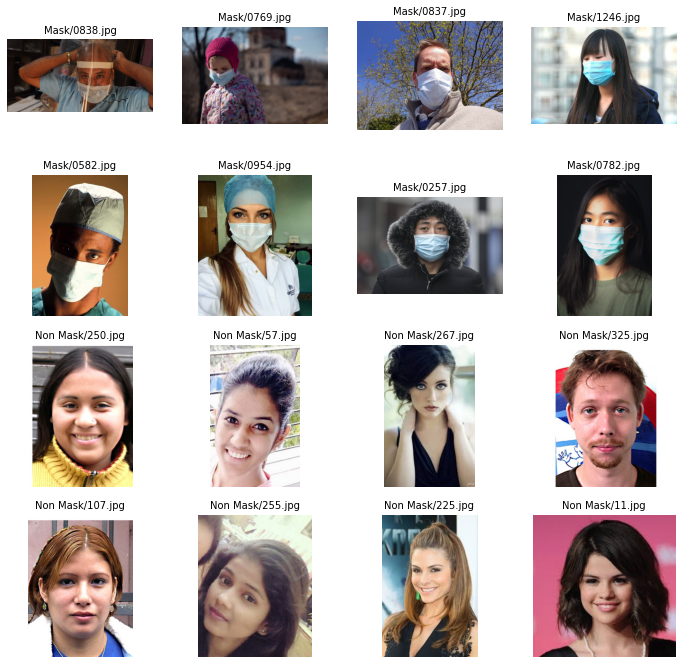

In [7]:
import matplotlib.image as mpimg
train_mask_img = []
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

for i in train_mask_names[0:8]:
  train_mask_img.append(os.path.join(train_mask_dir,i))

train_noMask_img = []
for i in train_noMask_names[0:8]:
  train_noMask_img.append(os.path.join(train_NoMask_dir,i))

print(train_mask_img)
print(train_noMask_img)

append_img = train_mask_img+train_noMask_img
print(append_img)

for i in range(0,len(append_img)):
  data =append_img[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(append_img[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [8]:
train_dataGen = ImageDataGenerator(rescale=1./255,
                                   zoom_range= 0.2,
                                   rotation_range=40,
                                   horizontal_flip= True)
test_dataGen = ImageDataGenerator(rescale=1./255)
validation_dataGen=ImageDataGenerator(rescale=1./255)
train_generator = train_dataGen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')
valid_generator = validation_dataGen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_dataGen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
train_generator.class_indices



{'Mask': 0, 'Non Mask': 1}

In [29]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))


model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))


# model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
# model.add(MaxPool2D(pool_size=(3,3)))
# model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 87616)            

In [31]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


history =model.fit(train_generator,
                   epochs= 32,
                    validation_data= valid_generator)

Epoch 1/32
19/19 [==============================] - 12s 625ms/step - loss: 0.1972 - accuracy: 0.9350 - val_loss: 0.3353 - val_accuracy: 0.8725
Epoch 2/32
19/19 [==============================] - 11s 595ms/step - loss: 0.1669 - accuracy: 0.9333 - val_loss: 0.3027 - val_accuracy: 0.8824
Epoch 3/32
19/19 [==============================] - 11s 587ms/step - loss: 0.1604 - accuracy: 0.9417 - val_loss: 0.2402 - val_accuracy: 0.9118
Epoch 4/32
19/19 [==============================] - 11s 586ms/step - loss: 0.1700 - accuracy: 0.9350 - val_loss: 0.2761 - val_accuracy: 0.8791
Epoch 5/32
19/19 [==============================] - 11s 587ms/step - loss: 0.1551 - accuracy: 0.9367 - val_loss: 0.2351 - val_accuracy: 0.9118
Epoch 6/32
19/19 [==============================] - 11s 584ms/step - loss: 0.1702 - accuracy: 0.9333 - val_loss: 0.2326 - val_accuracy: 0.9020
Epoch 7/32
19/19 [==============================] - 11s 578ms/step - loss: 0.1558 - accuracy: 0.9467 - val_loss: 0.1972 - val_accuracy: 0.9216

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

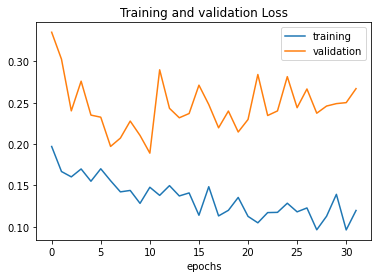

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

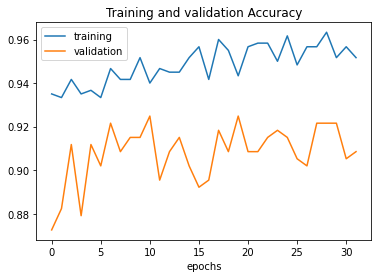

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation Accuracy')
plt.xlabel('epochs')

In [34]:
test_loss,test_acc = model.evaluate(test_generator)
print('test loss:{},test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 246ms/step - loss: 0.1583 - accuracy: 0.9200
test loss:0.15827035903930664,test acc:0.9200000166893005
